# Emotion Detection Algorithm

In [1]:
# IMPORT NECESSARY LIBRARIES
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os # interface with underlying OS that python is running on
import sys
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization, Dense
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
import IPython.display as ipd
basedir='/home/ia/code/pankaj-lewagon/ser/raw_data/ravdess_data/'

2021-09-04 22:27:05.669850: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-04 22:27:05.669965: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# PLAY AUDIO FILE
ipd.Audio(basedir+'Actor_01/03-01-01-01-01-01-01.wav')

## PLOTS

In [2]:
#DataFlair - Emotions in the RAVDESS dataset
emotions = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}

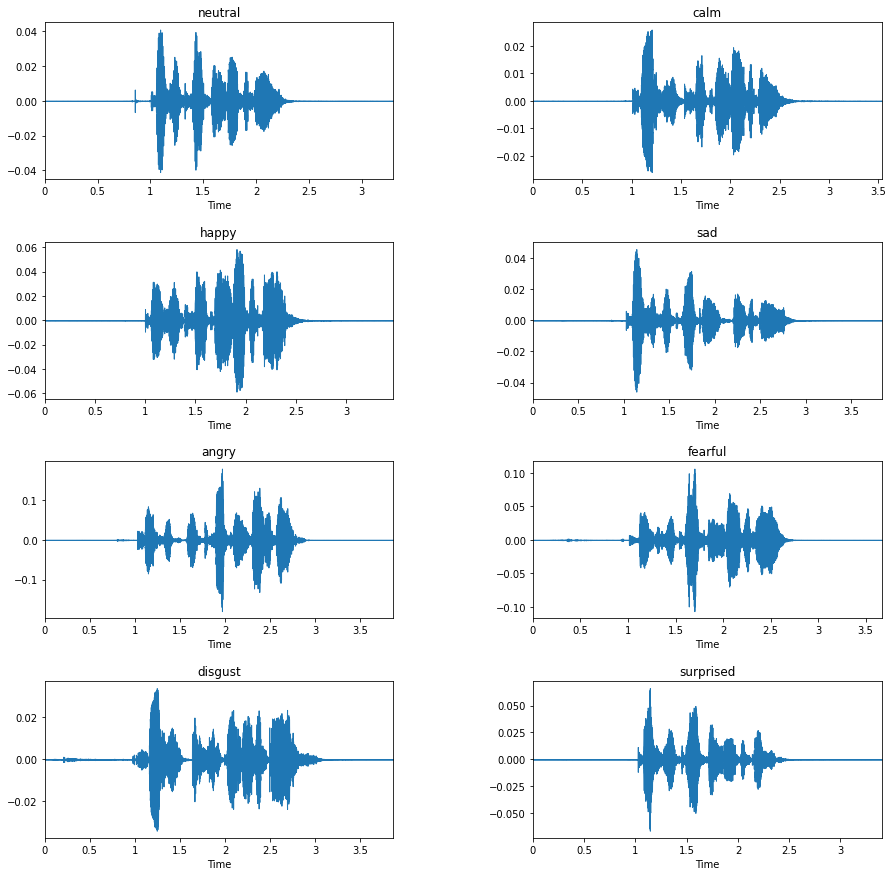

In [3]:
#audio, speech, {emotions}, normal intensity, kids statement, 1st repetition, 1st actor - profile

fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in emotions.keys():
  filename =f'{basedir}Actor_01/03-01-{i}-01-01-01-01.wav'
  fig.add_subplot(4, 2, int(i))
  plt.title(emotions[i])
  data,sample_rate = librosa.load(filename)
  librosa.display.waveplot(data, sr=sample_rate)


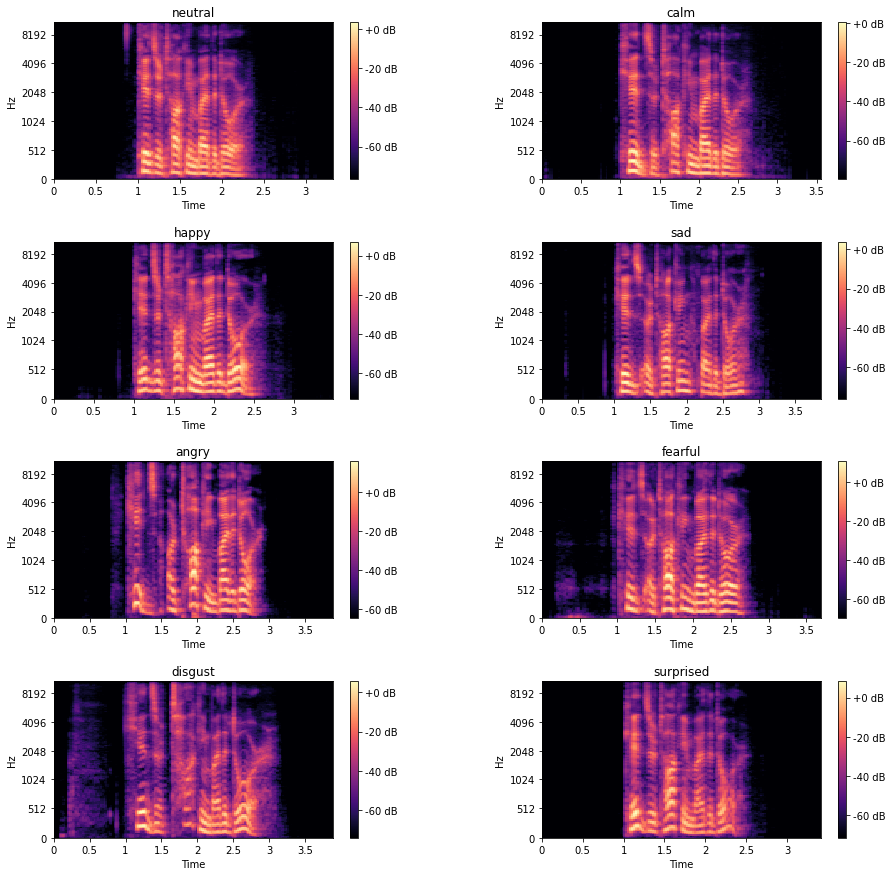

In [7]:
# MEL-SPECTRO
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in emotions.keys():
  filename =f'{basedir}Actor_01/03-01-{i}-01-01-01-01.wav'
  fig.add_subplot(4, 2, int(i))
  plt.title(emotions[i])
  data,sample_rate = librosa.load(filename)
  mel = librosa.feature.melspectrogram(y=data, sr=sample_rate, n_mels=128, fmax=8000)
  mel = librosa.power_to_db(mel)
  librosa.display.specshow(mel, sr=sample_rate, x_axis='time', y_axis='mel')
  plt.colorbar(format='%+2.0f dB')


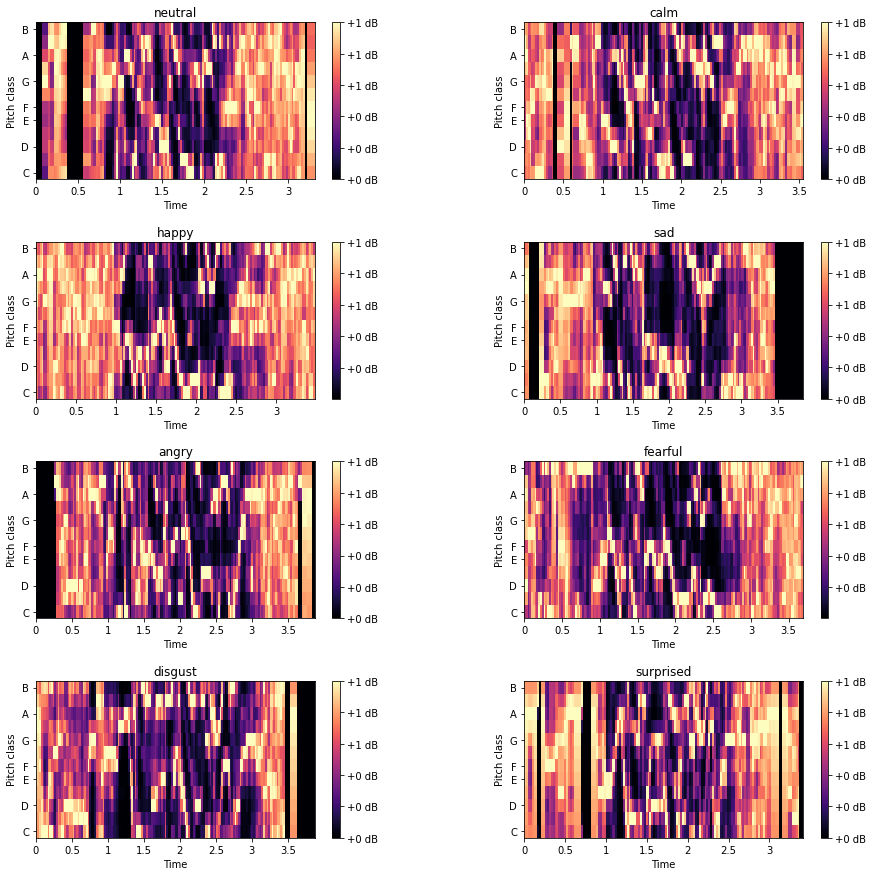

In [10]:
# CHROMA
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in emotions.keys():
    filename =f'{basedir}Actor_01/03-01-{i}-01-01-01-01.wav'
    fig.add_subplot(4, 2, int(i))
    plt.title(emotions[i])
    data,sample_rate = librosa.load(filename)
    chroma = librosa.feature.chroma_stft(y=data, sr=sample_rate)
    librosa.display.specshow(chroma, sr=sample_rate, x_axis='time', y_axis='chroma')
    plt.colorbar(format='%+2.0f dB')

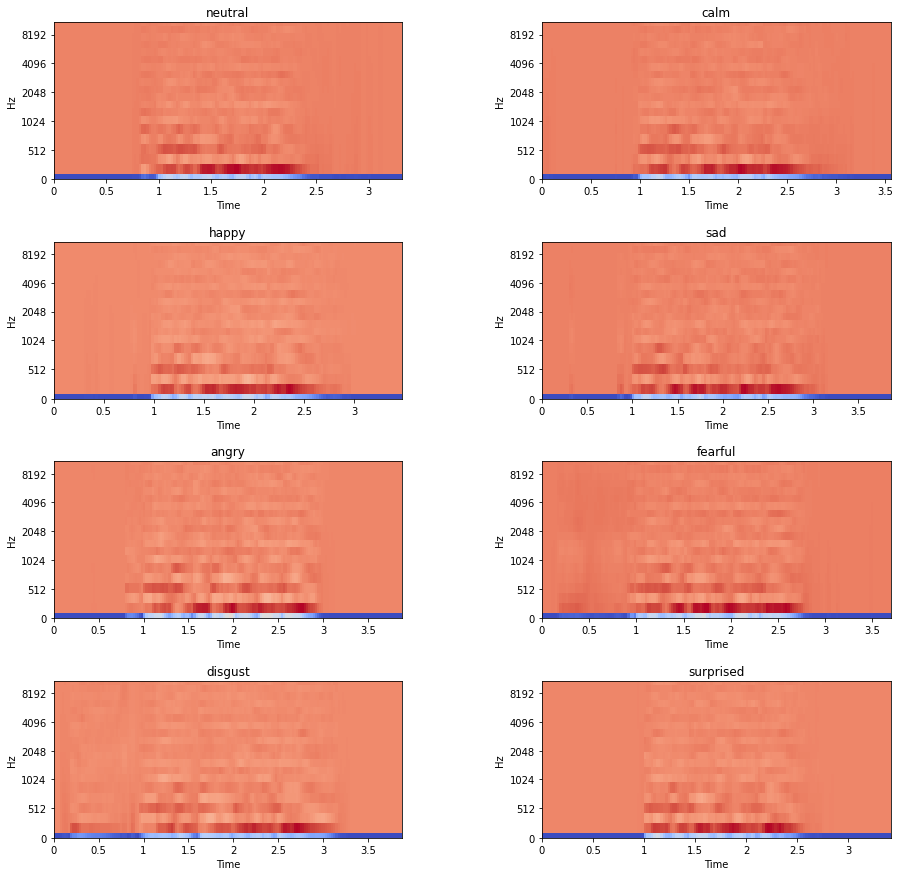

In [9]:
#MFCC
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in emotions.keys():
    filename =f'{basedir}Actor_01/03-01-{i}-01-01-01-01.wav'
    fig.add_subplot(4, 2, int(i))
    plt.title(emotions[i])
    data,sample_rate = librosa.load(filename)
    mfcc = librosa.feature.mfcc(y=data, sr=sample_rate)
    librosa.display.specshow(mfcc, sr=sample_rate, x_axis='time', y_axis='mel')

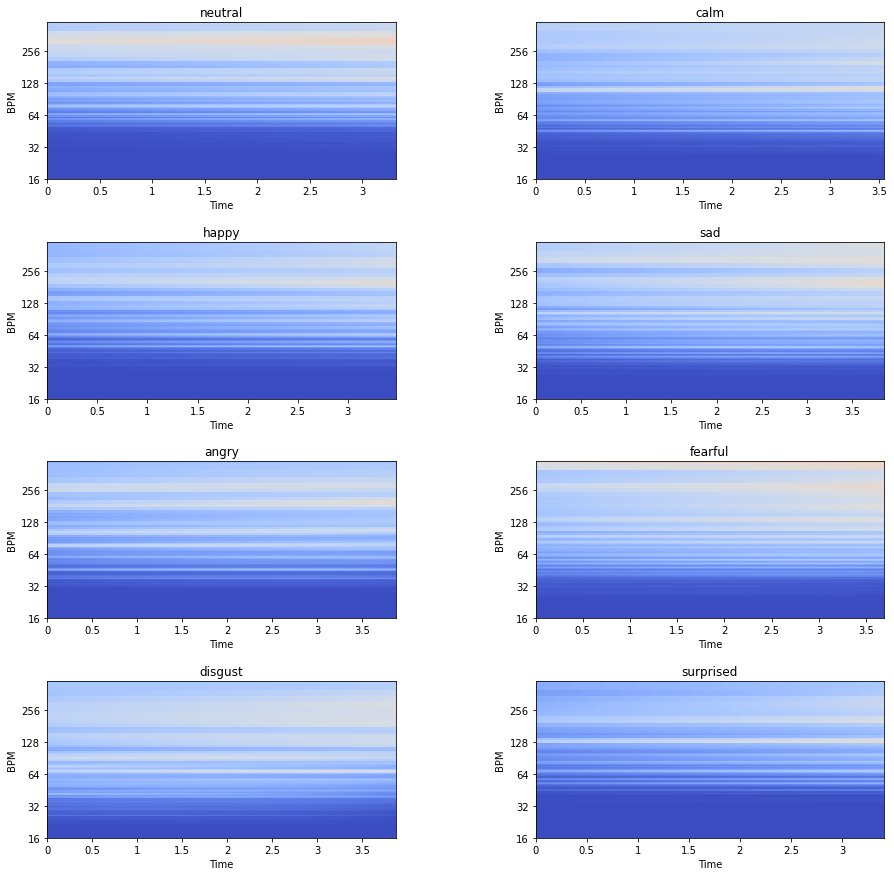

In [8]:
#TEMPOGRAM
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in emotions.keys():
    filename =f'{basedir}Actor_01/03-01-{i}-01-01-01-01.wav'
    fig.add_subplot(4, 2, int(i))
    plt.title(emotions[i])
    data,sample_rate = librosa.load(filename)
    temp = librosa.feature.tempogram(y=data, sr=sample_rate)
    librosa.display.specshow(temp, sr=sample_rate, x_axis='time', y_axis='tempo')

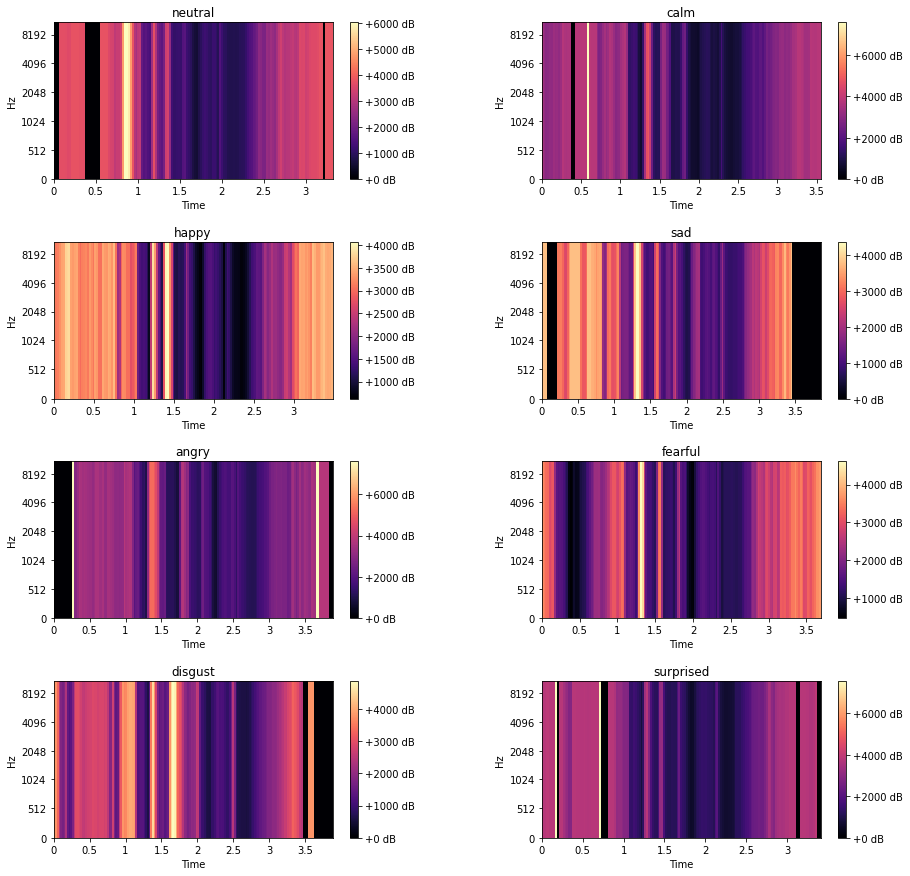

In [17]:
#SPECTRAL-CENTROID
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in emotions.keys():
    filename =f'{basedir}Actor_01/03-01-{i}-01-01-01-01.wav'
    fig.add_subplot(4, 2, int(i))
    plt.title(emotions[i])
    data,sample_rate = librosa.load(filename)
    spec = librosa.feature.spectral_centroid(y=data, sr=sample_rate)
    librosa.display.specshow(spec, sr=sample_rate, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')

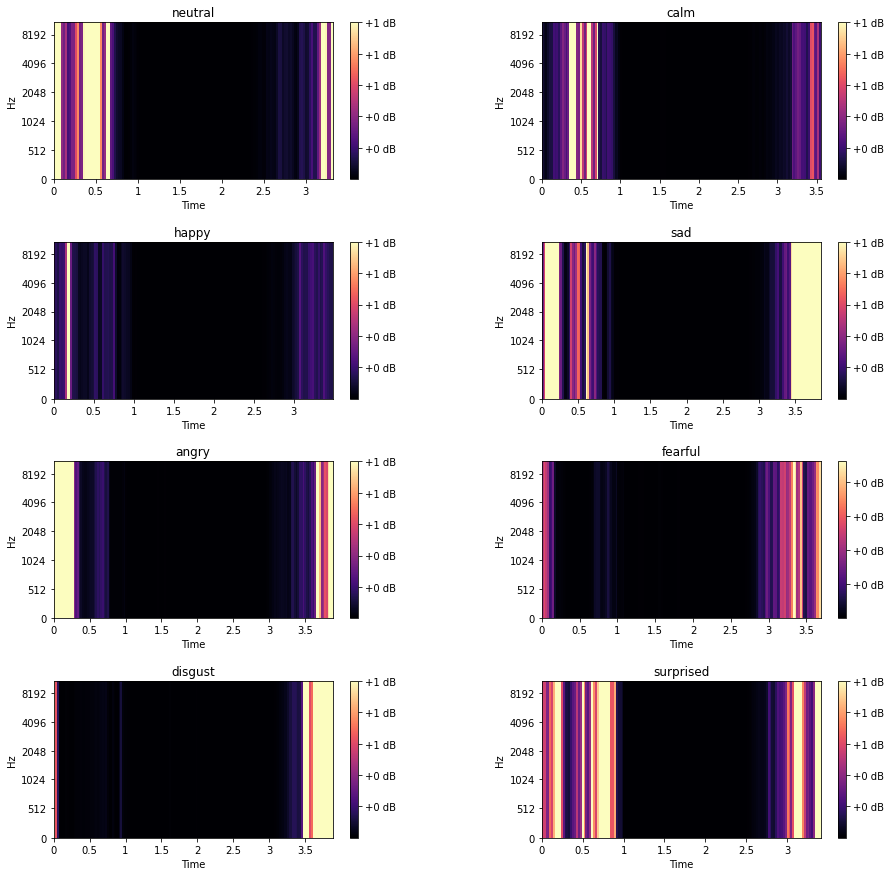

In [80]:
#SPECTRAL-FLATNESS
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in emotions.keys():
    filename =f'{basedir}Actor_01/03-01-{i}-01-01-01-01.wav'
    fig.add_subplot(4, 2, int(i))
    plt.title(emotions[i])
    data,sample_rate = librosa.load(filename)
    sf = librosa.feature.spectral_flatness(y=data)
    librosa.display.specshow(sf, sr=sample_rate, x_axis='time',y_axis='mel' )
    plt.colorbar(format='%+2.0f dB')

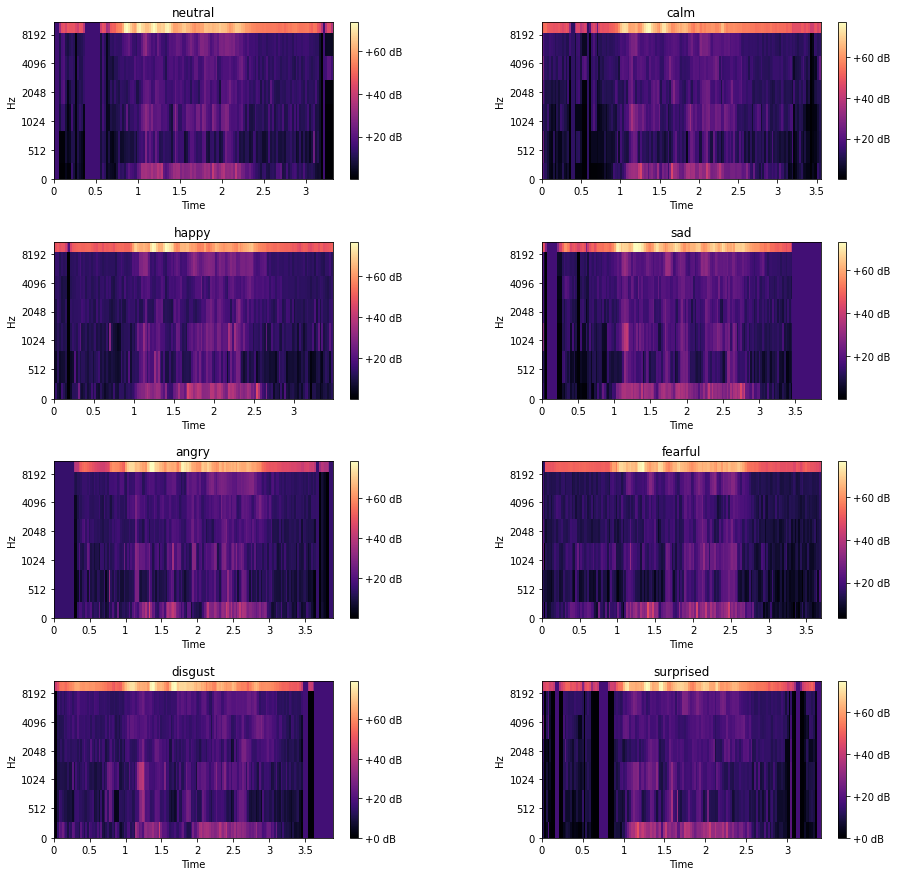

In [18]:
#SPECTRAL-CONTRAST
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in emotions.keys():
    filename =f'{basedir}Actor_01/03-01-{i}-01-01-01-01.wav'
    fig.add_subplot(4, 2, int(i))
    plt.title(emotions[i])
    data,sample_rate = librosa.load(filename)
    sc = librosa.feature.spectral_contrast(y=data, sr=sample_rate)
    librosa.display.specshow(sc, sr=sample_rate, x_axis='time',y_axis='mel' )
    plt.colorbar(format='%+2.0f dB')

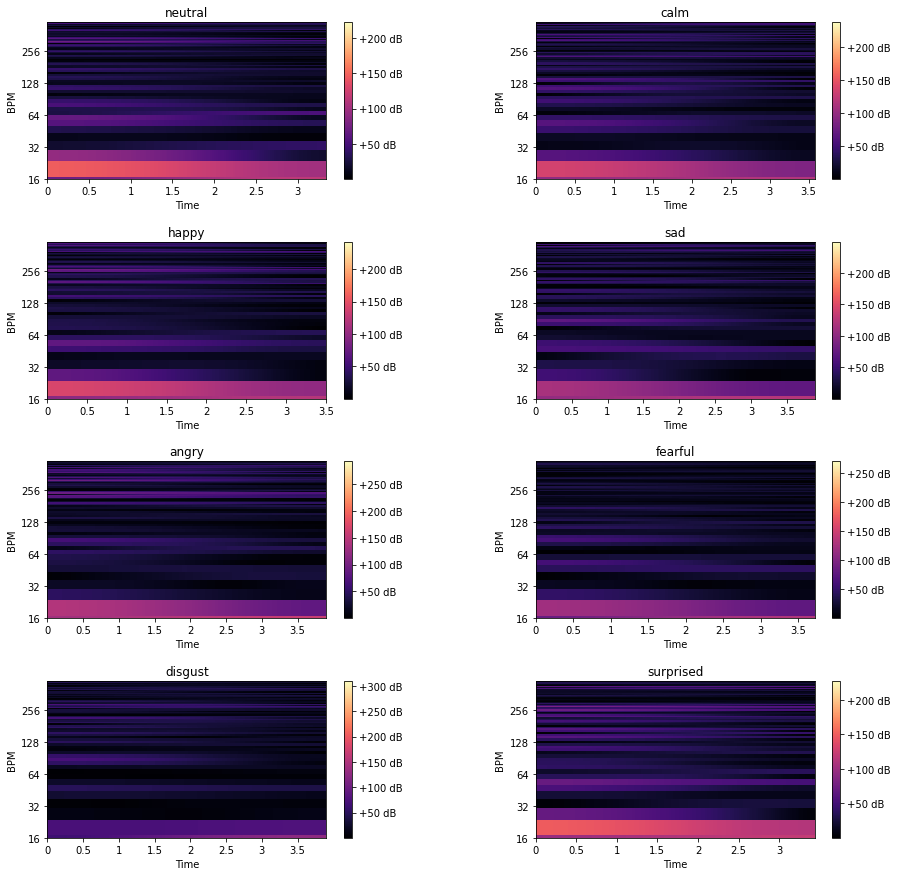

In [20]:
#FOURTIER-TEMPOGRAM
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in emotions.keys():
    filename =f'{basedir}Actor_01/03-01-{i}-01-01-01-01.wav'
    fig.add_subplot(4, 2, int(i))
    plt.title(emotions[i])
    data,sample_rate = librosa.load(filename)
    ft = librosa.feature.fourier_tempogram(y=data, sr=sample_rate)
    librosa.display.specshow(ft, sr=sample_rate, x_axis='time', y_axis='fourier_tempo')
    plt.colorbar(format='%+2.0f dB')

# Data Preprocessing

## Labeling Audio Files

In [21]:
# CREATE DIRECTORY OF AUDIO FILES 
basedir='/home/ia/code/pankaj-lewagon/ser/raw_data/ravdess_data/'
audio=basedir
actor_folders = os.listdir(audio) #list files in audio directory
actor_folders.sort() 
actor_folders[0:25];

In [22]:
# CREATE FUNCTION TO EXTRACT lABELS
emotion = []
gender = []
actor = []
file_path = []
for i in actor_folders:
    filename = os.listdir(audio + i) #iterate over Actor folders
    for f in filename: # go through files in Actor folder
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        actor.append(int(part[6]))
        bg = int(part[6])
        if bg%2 == 0:
            bg = "female"
        else:
            bg = "male"
        gender.append(bg)
        file_path.append(audio + i + '/' + f)

In [23]:
# PUT EXTRACTED LABELS WITH FILEPATH INTO DATAFRAME
audio_df = pd.DataFrame(emotion)
audio_df = audio_df.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
audio_df = pd.concat([pd.DataFrame(gender),audio_df,pd.DataFrame(actor)],axis=1)
audio_df.columns = ['gender','emotion','actor']
audio_df = pd.concat([audio_df,pd.DataFrame(file_path, columns = ['path'])],axis=1)
audio_df

,gender,emotion,actor,path
0,male,neutral,1,/home/ia/code/pankaj-lewagon/ser/raw_data/ravd...
1,male,fear,1,/home/ia/code/pankaj-lewagon/ser/raw_data/ravd...
2,male,surprise,1,/home/ia/code/pankaj-lewagon/ser/raw_data/ravd...
3,male,angry,1,/home/ia/code/pankaj-lewagon/ser/raw_data/ravd...
4,male,fear,1,/home/ia/code/pankaj-lewagon/ser/raw_data/ravd...
...,...,...,...,...
1435,female,surprise,24,/home/ia/code/pankaj-lewagon/ser/raw_data/ravd...
1436,female,angry,24,/home/ia/code/pankaj-lewagon/ser/raw_data/ravd...
1437,female,surprise,24,/home/ia/code/pankaj-lewagon/ser/raw_data/ravd...
1438,female,neutral,24,/home/ia/code/pankaj-lewagon/ser/raw_data/ravd...


In [24]:
query_df = audio_df.query('actor==1') #each actor has 59 file
query_df.shape

(60, 4)

In [25]:
query_df.head()

,gender,emotion,actor,path
0,male,neutral,1,/home/ia/code/pankaj-lewagon/ser/raw_data/ravd...
1,male,fear,1,/home/ia/code/pankaj-lewagon/ser/raw_data/ravd...
2,male,surprise,1,/home/ia/code/pankaj-lewagon/ser/raw_data/ravd...
3,male,angry,1,/home/ia/code/pankaj-lewagon/ser/raw_data/ravd...
4,male,fear,1,/home/ia/code/pankaj-lewagon/ser/raw_data/ravd...


In [26]:
# ENSURE GENDER,EMOTION, AND ACTOR COLUMN VALUES ARE CORRECT
pd.set_option('display.max_colwidth', -1)
audio_df.sample(10)

,gender,emotion,actor,path
1139,male,fear,19,/home/ia/code/pankaj-lewagon/ser/raw_data/ravdess_data/Actor_19/03-01-06-02-02-01-19.wav
1043,female,fear,18,/home/ia/code/pankaj-lewagon/ser/raw_data/ravdess_data/Actor_18/03-01-06-01-02-01-18.wav
480,male,fear,9,/home/ia/code/pankaj-lewagon/ser/raw_data/ravdess_data/Actor_09/03-01-06-02-02-01-09.wav
1101,male,surprise,19,/home/ia/code/pankaj-lewagon/ser/raw_data/ravdess_data/Actor_19/03-01-08-02-01-01-19.wav
790,female,disgust,14,/home/ia/code/pankaj-lewagon/ser/raw_data/ravdess_data/Actor_14/03-01-07-02-01-01-14.wav
561,female,fear,10,/home/ia/code/pankaj-lewagon/ser/raw_data/ravdess_data/Actor_10/03-01-06-01-01-01-10.wav
434,female,fear,8,/home/ia/code/pankaj-lewagon/ser/raw_data/ravdess_data/Actor_08/03-01-06-01-02-02-08.wav
1120,male,surprise,19,/home/ia/code/pankaj-lewagon/ser/raw_data/ravdess_data/Actor_19/03-01-08-01-02-01-19.wav
736,male,disgust,13,/home/ia/code/pankaj-lewagon/ser/raw_data/ravdess_data/Actor_13/03-01-07-02-02-01-13.wav
852,male,calm,15,/home/ia/code/pankaj-lewagon/ser/raw_data/ravdess_data/Actor_15/03-01-02-01-02-02-15.wav


<AxesSubplot:>

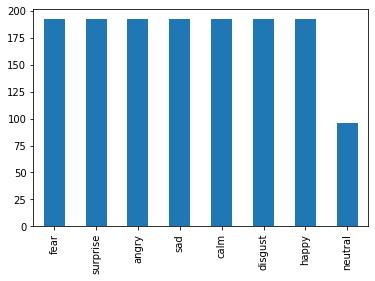

In [27]:
# LOOK AT DISTRIBUTION OF CLASSES
audio_df.emotion.value_counts().plot(kind='bar')

## Feature Extraction

In [61]:
# ITERATE OVER ALL AUDIO FILES AND EXTRACT FEATURES

#ls_mel = list()
ls_mfcc= list()
ls_chroma = list ()
ls_temp = list ()


for index,path in enumerate(audio_df.path):
    #X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=3,sr=44100,offset=0.5)
    X, sample_rate = librosa.load(path,res_type='kaiser_fast',offset=0.5, duration=2.40)
    
    #get the mel-scaled spectrogram (transform both the y-axis (frequency) to log scale, 
    # and the “color” axis (amplitude) to Decibels, which is kinda the log scale of amplitudes.)
    #mel = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000) 
    #db_spec = librosa.power_to_db(mel)
    
    #temporally average spectrogram
    #log_mel = np.mean(db_spec, axis = 0)
        
    #Mel-frequency cepstral coefficients (MFCCs)
    mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
    
    #mfcc = np.mean(mfcc,axis=0)
    
    # compute chroma energy (pertains to 12 different pitch classes)
    chroma = librosa.feature.chroma_stft(y=X, sr=sample_rate)
    #chroma = np.mean(chroma, axis = 0)

    temp = librosa.feature.tempogram(y=X, sr=sample_rate)
    #temp = np.mean(temp, axis=0)

    # compute spectral contrast
#     contrast = librosa.feature.spectral_contrast(y=X, sr=sample_rate)
#     contrast = np.mean(contrast, axis= 0)

    # compute zero-crossing-rate (zcr:the zcr is the rate of sign changes along a signal i.e.m the rate at 
#     which the signal changes from positive to negative or back - separation of voiced andunvoiced speech.)
#     zcr = librosa.feature.zero_crossing_rate(y=X)
#     zcr = np.mean(zcr, axis= 0)
    
    #df_mfcc.loc[counter] = [mfcc]
    #df_chroma.loc[counter] = [chroma]
    #df_mel.loc[counter] = [mel]
    #df_temp.loc[counter] = [temp]
    #ls_chroma.append(chroma)
    #ls_mel.append(mel)
    print(f'{mfcc.shape}, {chroma.shape}, {temp.shape}')
    ls_mfcc.append(mfcc)
    ls_temp.append(temp)
    ls_chroma.append(chroma)
    #counter=counter+1   

(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104),

(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104),

(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104),

(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104),

(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104),

(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104), (12, 104), (384, 104)
(13, 104),

# Prepping Data for Modeling

In [55]:
len(ls_mfcc), len(ls_temp), len(ls_chroma)

(1440, 1440, 1440)

In [64]:
np.concatenate(ls_mfcc)

array([[-8.4918103e+02, -8.4918103e+02, -8.4918103e+02, ...,
        -8.4818915e+02, -8.4195581e+02, -8.3858807e+02],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         1.4007885e+00,  9.8909779e+00,  1.4334494e+01],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         1.3949907e+00,  8.9744759e+00,  1.2869657e+01],
       ...,
       [ 1.0512531e+00,  1.0361457e+00,  5.3228664e-01, ...,
        -5.1062589e+00, -5.8965769e+00, -1.5961258e+00],
       [ 1.6254443e+00,  1.1328810e+00,  1.3131969e+00, ...,
         1.4890885e+00, -6.1787977e+00, -1.0333731e+01],
       [ 2.3060384e+00,  1.6815890e+00,  3.9777527e+00, ...,
        -1.4296468e+01, -8.7593040e+00, -1.6609930e+00]], dtype=float32)

In [65]:
X = np.column_stack((ls_mfcc, ls_temp, ls_chroma))

In [34]:
# TURN DATA INTO ARRAYS FOR KERAS
#X = np.array(list(zip(ls_mfcc, ls_temp, chroma)))
#X = np.asarray(X).astype('float32')
# ADD EXTRA DIMENSION FOR CNN
X = np.expand_dims(X, axis=-1)

print(X.shape)

(12, 3)


In [68]:
X.shape

(1440, 409, 104)

In [69]:
y = audio_df['emotion']
y

0       neutral 
1       fear    
2       surprise
3       angry   
4       fear    
        ...     
1435    surprise
1436    angry   
1437    surprise
1438    neutral 
1439    fear    
Name: emotion, Length: 1440, dtype: object

In [70]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

y = to_categorical(LabelEncoder().fit_transform(audio_df.emotion.values), num_classes=8)
y.shape

(1440, 8)

In [38]:
y

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [71]:
X[0].shape

(409, 104)

In [72]:
# TRAIN TEST SPLIT DATA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [73]:
X_train.shape

(1152, 409, 104)

In [74]:
y_train.shape

(1152, 8)

In [75]:
X_test.shape

(288, 409, 104)

In [76]:
y_test.shape

(288, 8)

# Modelling

## CNN+LSTM

In [77]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model

model = Sequential()
model.add(layers.LSTM(units=40, input_shape = (409,104), return_sequences = True, activation='tanh'))
model.add(layers.LSTM(units=40,  return_sequences = False, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

model.summary()

2021-09-04 23:55:12.933331: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-09-04 23:55:12.933680: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-09-04 23:55:12.934290: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-KI4O7NS): /proc/driver/nvidia/version does not exist
2021-09-04 23:55:12.934907: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 409, 40)           23200     
_________________________________________________________________
lstm_1 (LSTM)                (None, 40)                12960     
_________________________________________________________________
dense (Dense)                (None, 16)                656       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
Total params: 36,952
Trainable params: 36,952
Non-trainable params: 0
_________________________________________________________________


In [50]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model

model = Sequential()
model.add(layers.Conv2D(64, kernel_size=(3), activation='relu', input_shape=X[0].shape))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(64, kernel_size=(3),activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(64, kernel_size=(3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.4))

model.add(layers.Reshape((14, 704)))
model.add(layers.LSTM(units=40, activation='tanh'))
#model.add(layers.LSTM(units=20,  return_sequences = False, activation='relu'))
model.add(layers.Dense(8, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 126, 102, 64)      640       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 63, 51, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 61, 49, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 30, 24, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 22, 64)        36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 11, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 9856)             

In [78]:
# FIT MODEL AND USE CHECKPOINT TO SAVE BEST MODEL

# FIT MODEL AND USE CHECKPOINT TO SAVE BEST MODEL
checkpoint = ModelCheckpoint("best_initial_model.hdf5", monitor='val_accuracy', verbose=1,
    save_best_only=True, mode='max', period=1, save_weights_only=True)

model_history=model.fit(X_train, y_train,batch_size=16, epochs=50, validation_split=0.2, callbacks=[checkpoint])




2021-09-04 23:55:30.730695: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 156702624 exceeds 10% of free system memory.
2021-09-04 23:55:39.065111: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
58/58 [==============================] - 33s 406ms/step - loss: 2.0732 - accuracy: 0.1607 - val_loss: 2.0649 - val_accuracy: 0.1299

Epoch 00001: val_accuracy improved from -inf to 0.12987, saving model to best_initial_model.hdf5
Epoch 2/50
58/58 [==============================] - 23s 396ms/step - loss: 2.0546 - accuracy: 0.1737 - val_loss: 2.0599 - val_accuracy: 0.1732

Epoch 00002: val_accuracy improved from 0.12987 to 0.17316, saving model to best_initial_model.hdf5
Epoch 3/50
58/58 [==============================] - 27s 462ms/step - loss: nan - accuracy: 0.1878 - val_loss: nan - val_accuracy: 0.1429

Epoch 00003: val_accuracy did not improve from 0.17316
Epoch 4/50
58/58 [==============================] - 23s 391ms/step - loss: nan - accuracy: 0.1346 - val_loss: nan - val_accuracy: 0.1429

Epoch 00004: val_accuracy did not improve from 0.17316
Epoch 5/50
58/58 [==============================] - 23s 393ms/step - loss: nan - accuracy: 0.1346 - val_loss: nan - val_accuracy:

KeyboardInterrupt: 

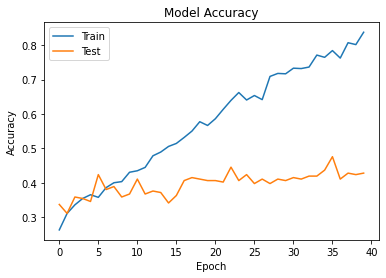

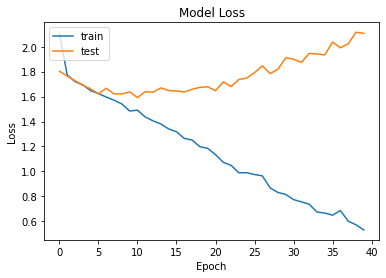

In [53]:

# PLOT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Post-Model Analysis

In [54]:
# PRINT LOSS AND ACCURACY PERCENTAGE ON TEST SET
print("Loss of the model is - " , model.evaluate(X_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

9/9 [==============================] - 2s 129ms/step - loss: 2.0487 - accuracy: 0.3750
Loss of the model is -  2.0487215518951416
9/9 [==============================] - 1s 120ms/step - loss: 2.0487 - accuracy: 0.3750
Accuracy of the model is -  37.5 %


In [58]:
predictions = model.predict(X_test)
predictions

array([[3.2856297e-03, 1.2472348e-04, 2.6462923e-04, ..., 2.5307076e-04,
        6.1436407e-03, 9.1810137e-01],
       [9.5563307e-03, 2.0334765e-02, 6.0606486e-01, ..., 7.1997033e-04,
        3.1620234e-01, 3.5304904e-02],
       [1.9555379e-02, 2.5897855e-03, 2.3928131e-03, ..., 3.8735248e-02,
        9.7236421e-04, 1.7347127e-01],
       ...,
       [4.5437973e-02, 2.0910207e-02, 5.7199103e-01, ..., 7.3782390e-04,
        1.1822373e-01, 2.3724806e-01],
       [2.2079526e-03, 1.8388791e-02, 1.9113231e-03, ..., 4.6196386e-01,
        1.8359428e-02, 1.1264034e-01],
       [2.6711714e-04, 2.0696928e-03, 4.4401986e-05, ..., 8.1449427e-04,
        8.5223362e-02, 8.0664742e-01]], dtype=float32)

In [64]:
# PREDICTIONS
#predictions = model.predict(X_test)
#predictions=predictions.argmax(axis=1)
#predictions = predictions.astype(int).flatten()
predictions = le.inverse_transform(predictions[:5])
predictions = pd.DataFrame({'Predicted Values': predictions})

# ACTUAL LABELS
actual=y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'Actual Values': actual})

# COMBINE BOTH 
finaldf = actual.join(predictions)
finaldf[140:150]

NotFittedError: This LabelEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
# CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION 
cm = confusion_matrix(actual, predictions)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.savefig('Initial_Model_Confusion_Matrix.png')
plt.show()

In [ ]:
print(classification_report(actual, predictions, target_names = ['angry','calm','disgust','fear','happy','neutral','sad','surprise']))

## Hyperparameter Tuning

In [ ]:
# TRAIN TEST SPLIT DATA
train,test = train_test_split(df_combined, test_size=0.2, random_state=0,
                               stratify=df_combined[['gender','actor']])

X_train = train.iloc[:, 3:]
y_train = train.iloc[:,:2].drop(columns=['gender'])
print(X_train.shape)

X_test = test.iloc[:,3:]
y_test = test.iloc[:,:2].drop(columns=['gender'])
print(X_test.shape)

In [ ]:
# NORMALIZE DATA
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

In [ ]:
# TURN DATA INTO ARRAYS FOR KERAS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
# RESHAPE TO INCLUDE 3D TENSOR
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]

In [ ]:
# from keras.utils import np_utils, to_categorical

lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [ ]:
# CREATE FUNCTION FOR KERAS CLASSIFIER
opt = keras.optimizers.Adam(lr=0.0001)
def make_classifier(optimizer=opt):
    #BUILD CNN MODEL
    model = Sequential()
    model.add(layers.Conv1D(64, kernel_size=(10), activation='relu', input_shape=(X_train.shape[1],1)))
    model.add(layers.Conv1D(128, kernel_size=(10),activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
    model.add(layers.MaxPooling1D(pool_size=(8)))
    model.add(layers.Dropout(0.4))
    model.add(layers.Conv1D(128, kernel_size=(10),activation='relu'))
    model.add(layers.MaxPooling1D(pool_size=(8)))
    model.add(layers.Dropout(0.4))
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.4))
    model.add(layers.Dense(8, activation='sigmoid'))
    opt = keras.optimizers.Adam(lr=0.0001)
    model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
    return model


In [ ]:
y_trainHot=np.argmax(y_train, axis=1)

In [ ]:
# GRID SEARCH PARAMETERS TO FIND BEST VALUES
classifier = KerasClassifier(build_fn = make_classifier)
params = {
    'batch_size': [30, 32, 34],
    'nb_epoch': [25, 50, 75],
    'optimizer':['adam','SGD']}

grid_search = GridSearchCV(estimator=classifier,
                           param_grid=params,
                           scoring='accuracy',
                           cv=5)

grid_search = grid_search.fit(X_train,y_trainHot)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_score_